# Electric Vehicles Market Size Analysis using Python

## Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Load dataset

In [3]:
data=pd.read_csv('Electric_vehicle.csv')

## Data Exploration

In [4]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

#### The spelling of 'Country' column is incorrect which may cause confusion on further exploration so let's correct it.

In [6]:
data.rename(columns={'County':'Country'},inplace=True)
data.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

#### Replace  all the spaces of columns with '_'.

In [7]:
col=data.columns
data.columns=[name.replace(" ","_") for name in col]
data.columns

Index(['VIN_(1-10)', 'Country', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [8]:
data.shape

(177866, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN_(1-10)                                         177866 non-null  object 
 1   Country                                            177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal_Code                                        177861 non-null  float64
 5   Model_Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric_Vehicle_Type                              177866 non-null  object

In [10]:
data.isnull().sum()

VIN_(1-10)                                             0
Country                                                5
City                                                   5
State                                                  0
Postal_Code                                            5
Model_Year                                             0
Make                                                   0
Model                                                  0
Electric_Vehicle_Type                                  0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility      0
Electric_Range                                         0
Base_MSRP                                              0
Legislative_District                                 389
DOL_Vehicle_ID                                         0
Vehicle_Location                                       9
Electric_Utility                                       5
2020_Census_Tract                                      5
dtype: int64

#### Drop all the null values.

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

VIN_(1-10)                                           0
Country                                              0
City                                                 0
State                                                0
Postal_Code                                          0
Model_Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility    0
Electric_Range                                       0
Base_MSRP                                            0
Legislative_District                                 0
DOL_Vehicle_ID                                       0
Vehicle_Location                                     0
Electric_Utility                                     0
2020_Census_Tract                                    0
dtype: int64

In [13]:
data.describe()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
count,177473.000000,177473.000000,177473.000000,177473.000000,177473.000000,1.774730e+05,1.774730e+05
mean,98260.199332,2020.517115,58.826548,1070.609839,29.127710,2.202527e+08,5.303981e+10
std,303.694979,2.989179,91.973457,8346.920672,14.892259,7.585304e+07,1.620333e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.815241e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282691e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548504e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


## Data Visualization and Analysis

### Let's analyze the adoptation of EV over time.

In [14]:
data.head(1)

,VIN_(1-10),Country,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


/var/folders/tz/x4nyk_3177g_wk1rwy7nsjcm0000gn/T/ipykernel_16316/43019373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=adopt_year.index, y=adopt_year.values, palette='icefire')


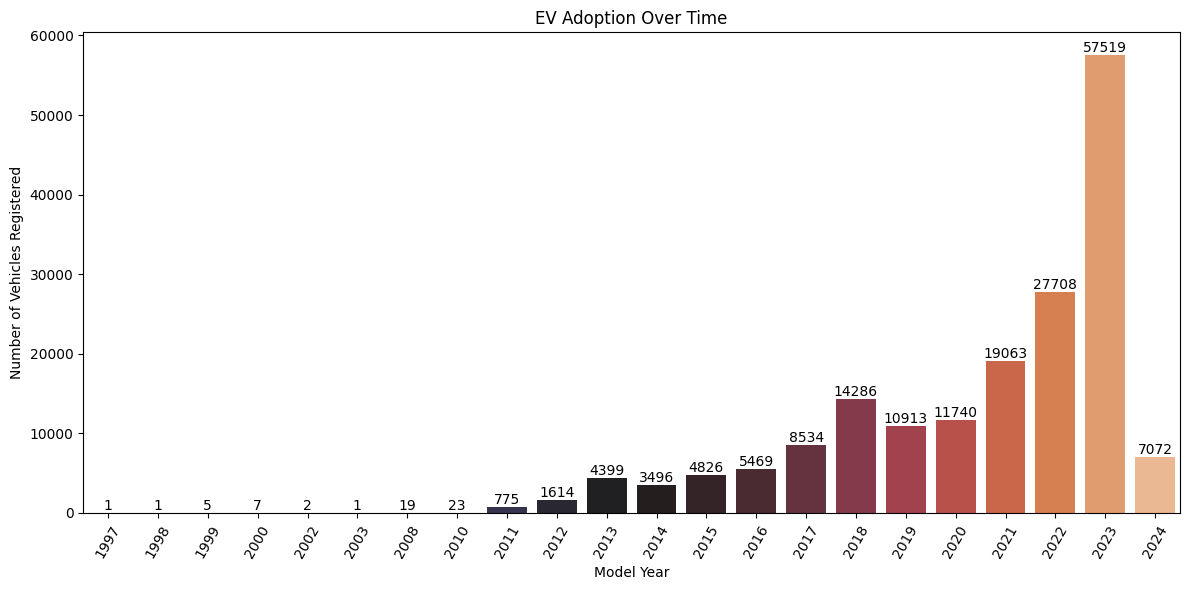

In [15]:
adopt_year = data['Model_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=adopt_year.index, y=adopt_year.values, palette='icefire')
for i, v in enumerate(adopt_year.values):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



##### From the above bar chart, we can clearly see that adoptation has been increasing over time specially from 2015. But in the year of 2019 and 2020 the adoptation had decreased whose major reason could be covid-19. Other than that the adoptation rate of EV is increasing with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

### Analyze by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties.

In [16]:
top_coountries=data['Country'].value_counts().head(3).index
top_countries_data = data[data['Country'].isin(top_coountries)] # it includes all the possible outcomes
top_cities_data = top_countries_data.groupby(['Country', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles').head(10)
top_countries_data

,VIN_(1-10),Country,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177858,5YJ3E1EB8N,Snohomish,Snohomish,WA,98296.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,213520422,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


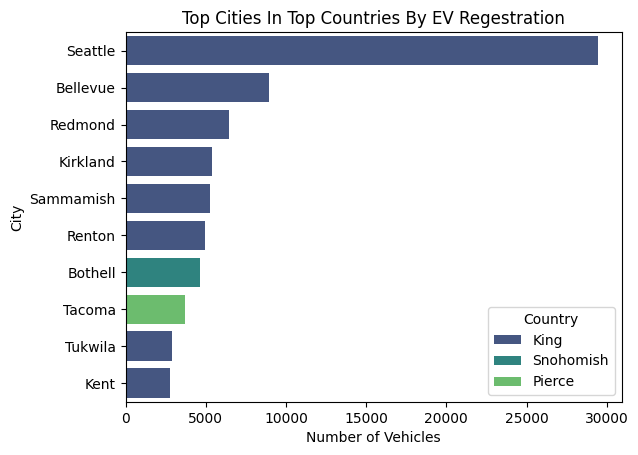

In [17]:
ax=sns.barplot(top_cities_data,x=top_cities_data['Number of Vehicles'],y=top_cities_data['City'],hue='Country',palette="viridis",orient='h')
plt.title("Top Cities In Top Countries By EV Regestration")
plt.show()

#### conclusion: 

## Next, let’s explore the types of electric vehicles represented in this dataset.

/var/folders/tz/x4nyk_3177g_wk1rwy7nsjcm0000gn/T/ipykernel_16316/827854518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(vehicle_type,palette='inferno')


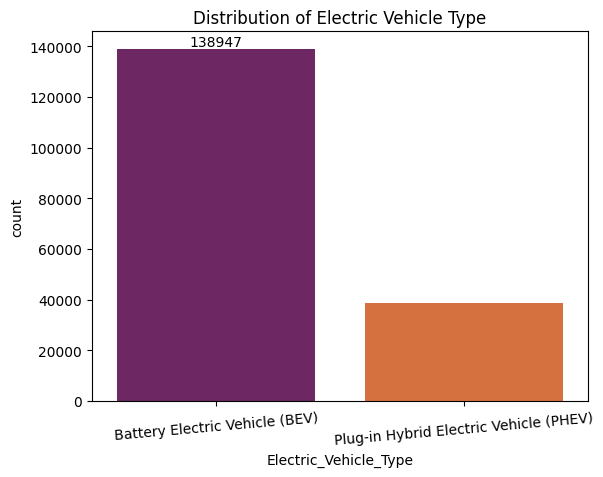

In [18]:
vehicle_type=data['Electric_Vehicle_Type'].value_counts()
plt.Figure(figsize=(6,8))
ax=sns.barplot(vehicle_type,palette='inferno')
ax.bar_label(ax.containers[0])
plt.title("Distribution of Electric Vehicle Type")
plt.xticks(rotation=5)
plt.show()

#### The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

## Lets identify which manufacturers and specific models dominate the EV market.

/var/folders/tz/x4nyk_3177g_wk1rwy7nsjcm0000gn/T/ipykernel_16316/2057499451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_distribution,orient='h',palette="rocket")


Text(0.5, 1.0, 'Top 10 EV Makes')

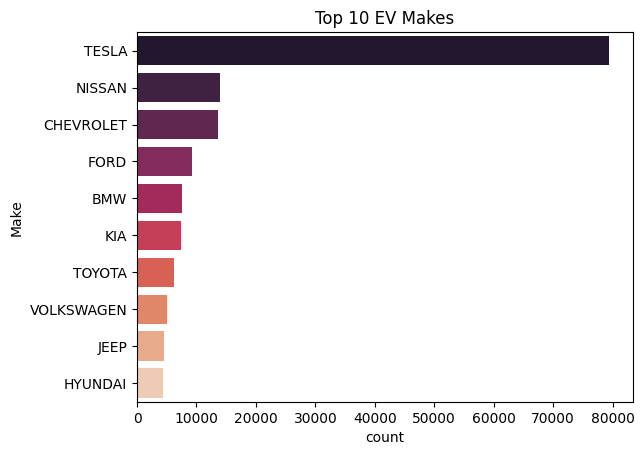

In [19]:
top_distribution=data['Make'].value_counts().head(10)
sns.barplot(top_distribution,orient='h',palette="rocket")
plt.title("Top 10 EV Makes")


#### TESLA leads by a substantial margin with the highest number of vehicles registered. NISSAN is the second most popular manufacturer, followed by CHEVROLET. FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.


### Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences

In [20]:
top_3_make= data['Make'].value_counts().head(3).index
top_3_make_data=data[data['Make'].isin(top_3_make)]
top_3_distribution=top_3_make_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name="Number_of_vehicle").head(10)
top_3_distribution

,Make,Model,Number_of_vehicle
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


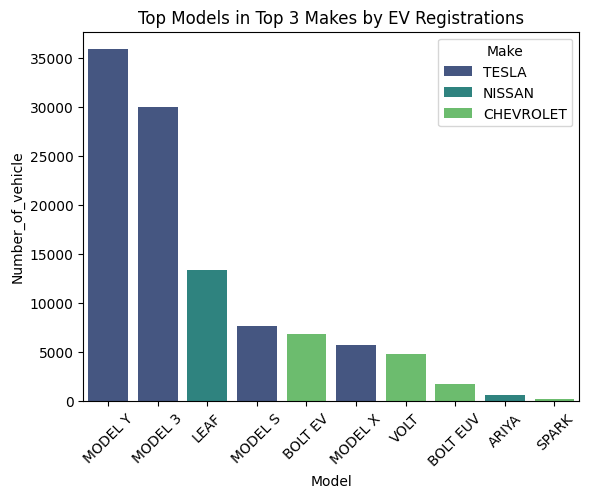

In [21]:
sns.barplot(data=top_3_distribution,x=top_3_distribution['Model'],y=top_3_distribution['Number_of_vehicle'],hue='Make',palette='viridis')
plt.xticks(rotation=45)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.show()

### Findings:
##### 1. TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations
##### 2. TESLA’s MODEL S and MODEL X also have a significant number of registrations.
##### 3. NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
##### 4. NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown

## Next, we’ll explore the electric range of vehicles.

In [22]:
data.head(1)

,VIN_(1-10),Country,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


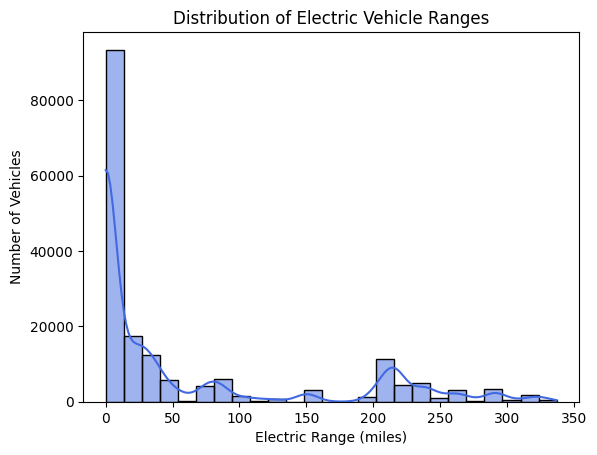

In [23]:
sns.histplot(data['Electric_Range'],kde=True,bins=25,color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.show()

##### The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.  The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.

### Now, let’s dive into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time.

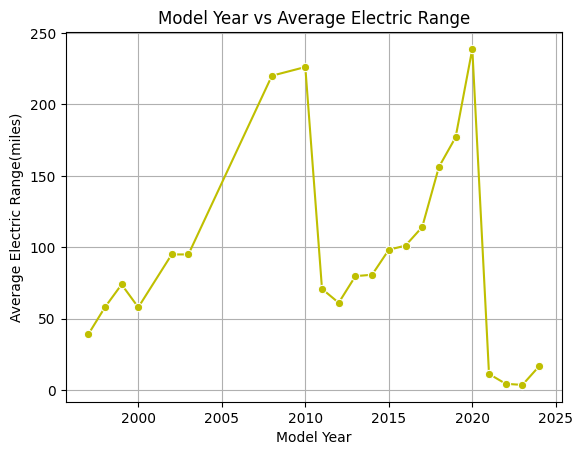

In [24]:
model_range=data.groupby('Model_Year')['Electric_Range'].mean().reset_index()
sns.lineplot(data=model_range,x=model_range['Model_Year'],y=model_range['Electric_Range'],marker='o',color='y')
plt.title("Model Year vs Average Electric Range")
plt.xlabel("Model Year")
plt.ylabel("Average Electric Range(miles)")
plt.grid(True)
plt.show()

### Findings:
##### 1. There is a noticeable peak around the year 2020 when the average range reaches its highest point.
##### 2. There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
#### 3. After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.



### Next, let’s explore how electric ranges vary among the top manufacturers and models.

In [25]:
data.head(2)

,VIN_(1-10),Country,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


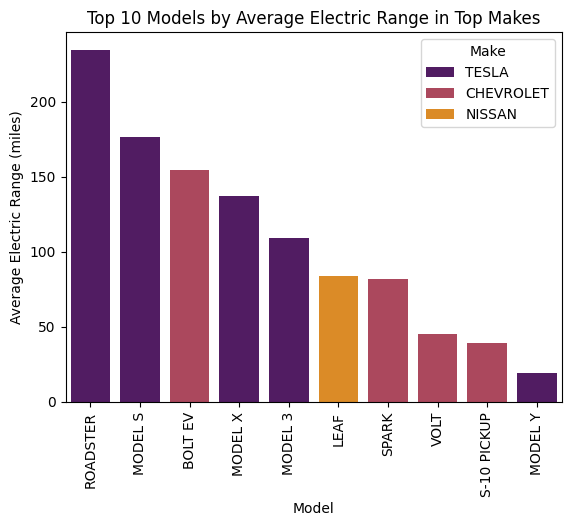

In [26]:
top3_make=data['Make'].value_counts().head(3).index
top3_make_data=data[data['Make'].isin(top3_make)]
top3_make_distribution=top3_make_data.groupby(['Make','Model'])['Electric_Range'].mean().sort_values(ascending=False).reset_index().head(10)
sns.barplot(top3_make_distribution,x=top3_make_distribution['Model'],y=top3_make_distribution['Electric_Range'],hue='Make',palette='inferno')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.ylabel('Average Electric Range (miles)')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.show()


### Finding:
##### The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges.

In [27]:
data.head()

,VIN_(1-10),Country,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [51]:
yearl_data=data.groupby('Model_Year').size().reset_index(name="Vehicle_count")
yearl_data

,Model_Year,Vehicle_count
0,1997,1
1,1998,1
2,1999,5
3,2000,7
4,2002,2
5,2003,1
6,2008,19
7,2010,23
8,2011,775
9,2012,1614


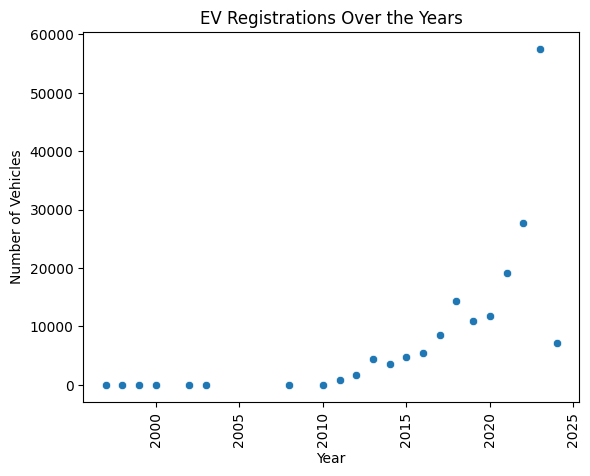

In [52]:
sns.scatterplot( data=yearl_data,x=yearl_data['Model_Year'], y=yearl_data['Vehicle_count'])
plt.title('EV Registrations Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()


In [53]:
correlation = yearl_data['Model_Year'].corr(yearl_data['Vehicle_count'])
print(f"Correlation between Year and Vehicle Count: {correlation}")


Correlation between Year and Vehicle Count: 0.6324131756109249


##### The analysis shows a steady increase in electric vehicle (EV) adoption over the years, with a peak in 2023. A moderate positive correlation (0.63) between year and vehicle count confirms that EV adoption is rising over time. Battery Electric Vehicles (BEVs) dominate the market, and a few top countries contribute the most to global EV registrations. Despite a brief dip around 2020 (likely due to COVID-19), the overall trend points toward a strong and growing EV market.

